<a href="https://colab.research.google.com/github/jaramillooo/etica_datos/blob/main/DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#!unzip :n "/Users/axeljaramillo/Documents/etica_ds/archive (2).zip"

In [44]:
from google.colab import drive

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Dataset columns description:

school : student's school (binary: 'GP' : Gabriel Pereira or 'MS' : Mousinho da Silveira)

sex : student's sex (binary: 'F' : female or 'M' : male)

age : student's age (numeric: from 15 to 22)

address : student's home address type (binary: 'U' : urban or 'R' : rural)

famsize : family size (binary: 'LE3' : less or equal to 3 or 'GT3' : greater than 3)

Pstatus : parent's cohabitation status (binary: 'T' : living together or 'A' : apart)

Medu : mother's education (numeric: 0 : none, 1 : primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu : father's education (numeric: 0 : none, 1 : primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob : mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob : father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
reason : reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian : student's guardian (nominal: 'mother', 'father' or 'other')

traveltime : home to school travel time (numeric: 1 : <15 min., 2 : 15 to 30 min., 3 : 30 min. to 1 hour, or 4 : >1 hour)

studytime : weekly study time (numeric: 1 : <2 hours, 2 : 2 to 5 hours, 3 : 5 to 10 hours, or 4 : >10 hours)

failures : number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup : extra educational support (binary: yes or no)

famsup : family educational support (binary: yes or no)

paid : extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities : extra:curricular activities (binary: yes or no)

nursery : attended nursery school (binary: yes or no)

higher : wants to take higher education (binary: yes or no)

internet : Internet access at home (binary: yes or no)

romantic : with a romantic relationship (binary: yes or no)

famrel : quality of family relationships (numeric: from 1 : very bad to 5 : excellent)

freetime : free time after school (numeric: from 1 : very low to 5 : very high)

goout : going out with friends (numeric: from 1 : very low to 5 : very high)

Dalc : workday alcohol consumption (numeric: from 1 : very low to 5 : very high)

Walc : weekend alcohol consumption (numeric: from 1 : very low to 5 : very high)

health : current health status (numeric: from 1 : very bad to 5 : very good)

absences : number of school absences (numeric: from 0 to 93)

: These grades are related with the course subject, Math or Portuguese:
G1 : first period grade (numeric: from 0 to 20)

G2 : second period grade (numeric: from 0 to 20)

G3 : final grade (numeric: from 0 to 20, output target)

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df = pd.read_csv("/content/drive/MyDrive/ciencia_etica/New Folder With Items/student-mat.csv")
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [127]:
print("nulos:",sum(df.isnull().sum()))

nulos: 0


In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.00,16.70,1.28,15.00,16.00,17.00,18.00,22.00
Medu,395.00,2.75,1.09,0.00,2.00,3.00,4.00,4.00
Fedu,395.00,2.52,1.09,0.00,2.00,2.00,3.00,4.00
traveltime,395.00,1.45,0.70,1.00,1.00,1.00,2.00,4.00
studytime,395.00,2.04,0.84,1.00,1.00,2.00,2.00,4.00
failures,395.00,0.33,0.74,0.00,0.00,0.00,0.00,3.00
famrel,395.00,3.94,0.90,1.00,4.00,4.00,5.00,5.00
freetime,395.00,3.24,1.00,1.00,3.00,3.00,4.00,5.00
goout,395.00,3.11,1.11,1.00,2.00,3.00,4.00,5.00
Dalc,395.00,1.48,0.89,1.00,1.00,1.00,2.00,5.00


{'whiskers': [<matplotlib.lines.Line2D at 0x7a950dfdd4b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a950dfdfc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a950dfddba0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a950dfdf790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a950dfdd0f0>],
 'means': []}

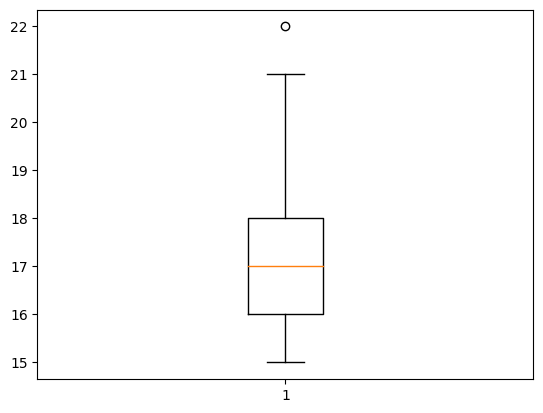

In [129]:
plt.boxplot(df["age"])

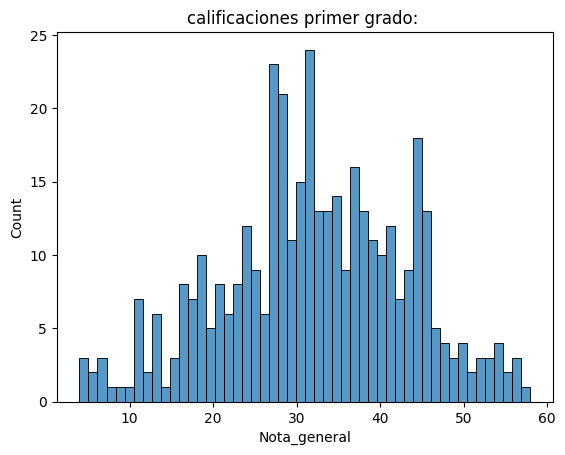

In [130]:
df["Nota_general"]=df["G1"]+df["G2"]+df["G3"]
sns.histplot(df["Nota_general"],bins=50)
plt.title("calificaciones primer grado: ")
plt.show()

Text(0.5, 1.0, 'faltas en promedio relación con tiempo de studio')

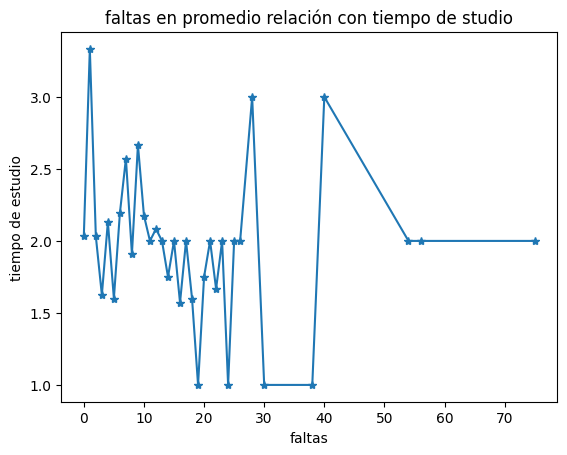

In [131]:
time=df.groupby('absences')['studytime'].mean().plot.line(marker='*')
plt.xlabel('faltas')
plt.ylabel('tiempo de estudio')
plt.title('faltas en promedio relación con tiempo de studio')

Text(0.5, 1.0, 'tiempo de estudio por edad')

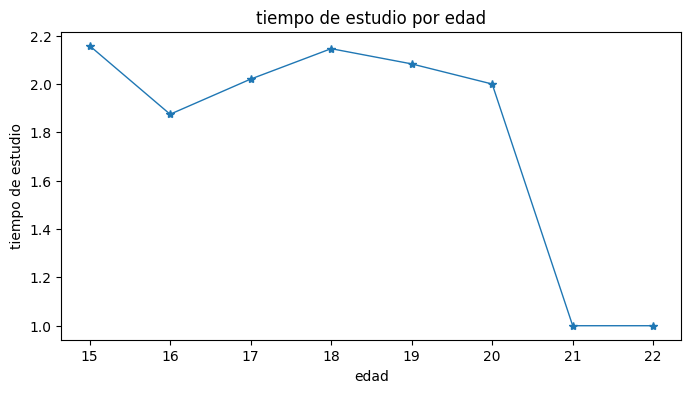

In [132]:
time=df.groupby('age')['studytime'].mean().plot.line(figsize=(8,4),marker='*',linewidth=1)
plt.xlabel('edad')
plt.ylabel('tiempo de estudio')
plt.title('tiempo de estudio por edad')

Text(0.5, 1.0, 'relación familiar  y consumo de alcohol')

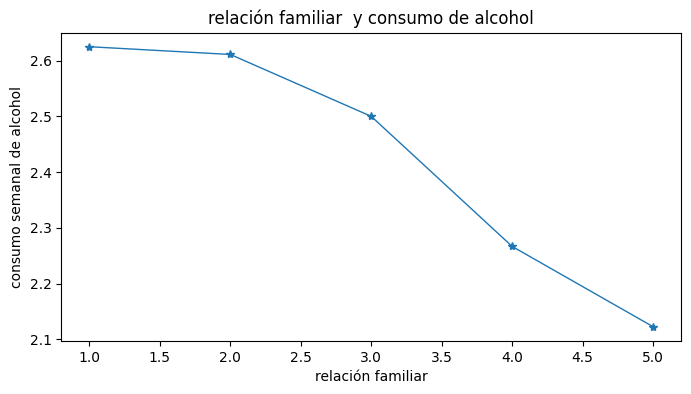

In [133]:
time = df.groupby('famrel')['Walc'].mean().plot.line(figsize=(8,4),marker='*',linewidth=1)
plt.xlabel('relación familiar')
plt.ylabel('consumo semanal de alcohol')
plt.title('relación familiar  y consumo de alcohol')

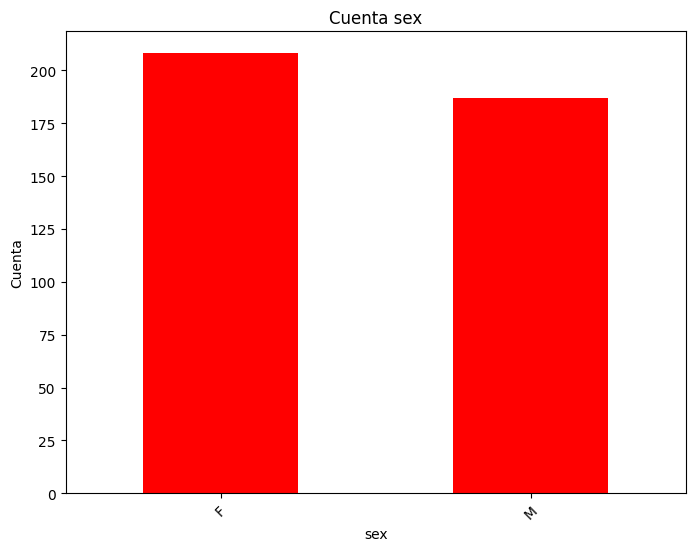

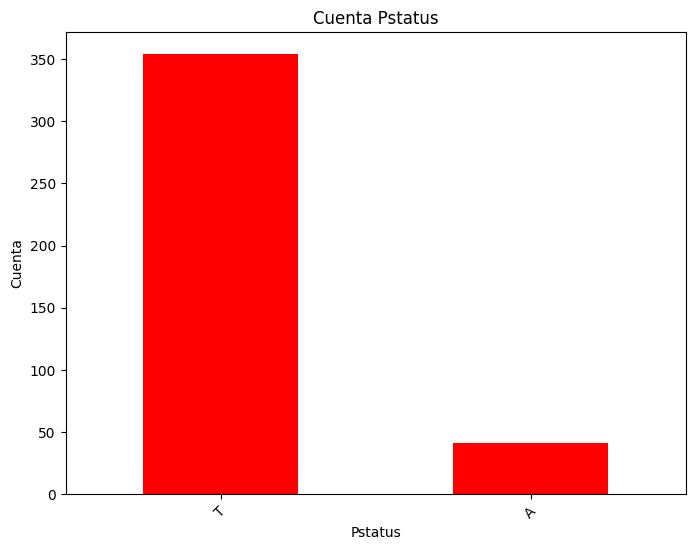

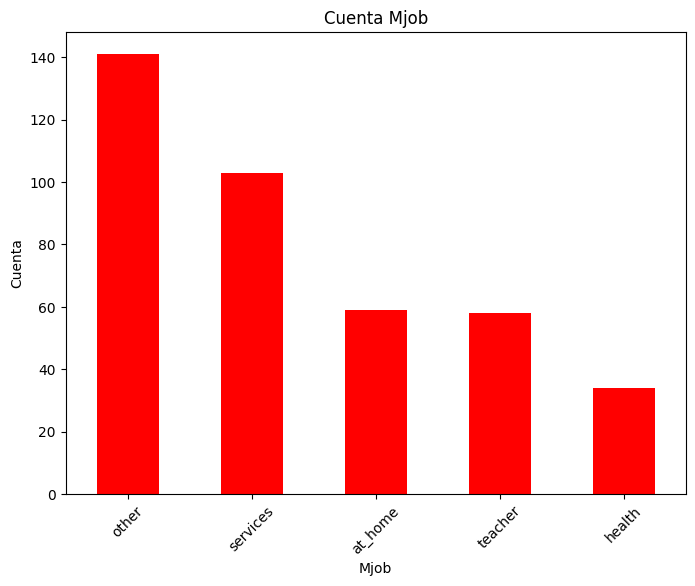

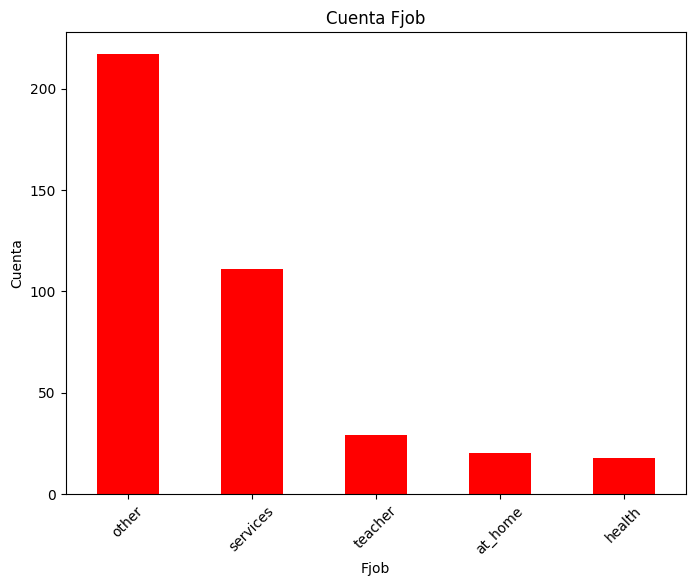

In [134]:
object_columns = df[['sex','Pstatus','Mjob','Fjob']]

for column in object_columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='red')
    plt.title(f'Cuenta {column}')
    plt.xlabel(column)
    plt.ylabel('Cuenta')
    plt.xticks(rotation=45)
    plt.show()

Text(0.5, 1.0, 'frecuencia de salidas y consumo de alcohol')

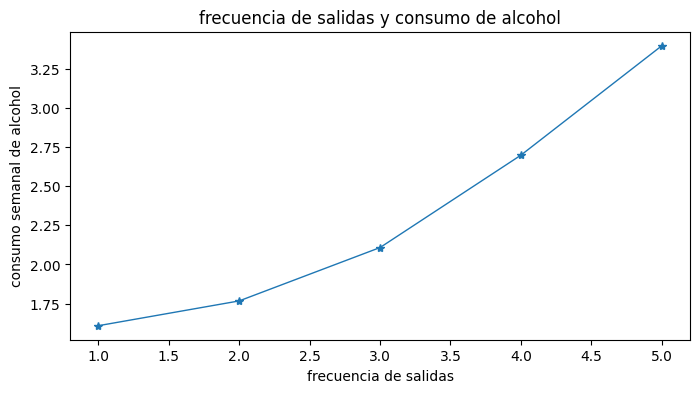

In [135]:
time = df.groupby('goout')['Walc'].mean().plot.line(figsize=(8,4),marker='*',linewidth=1)
plt.xlabel('frecuencia de salidas')
plt.ylabel('consumo semanal de alcohol')
plt.title('frecuencia de salidas y consumo de alcohol')

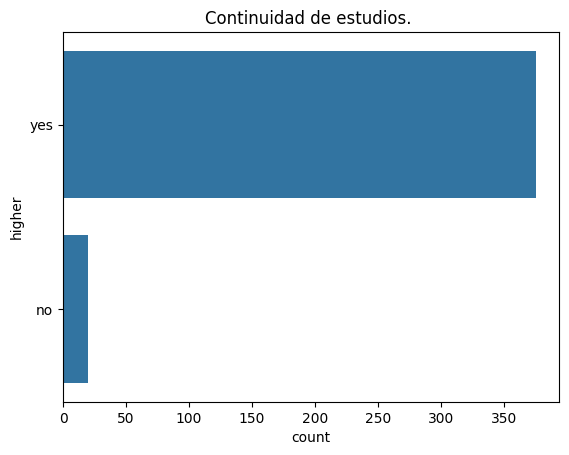

In [136]:
sns.countplot(df["higher"])
plt.title("Continuidad de estudios. ")
plt.show()

# Modelos


Para los modelos a revisar se implementó LazyClassifier, posteriormente se seleccionó el mejor modelo para nuestros datos, posterior se hizo el modelado para cada variable sensible con la separación y la aplicación de threshold optimizer y conteo de métricas con fairlearn.



In [137]:
df0 = pd.DataFrame(df)

# Select object columns
object_columns = df0.select_dtypes(include=['object'])

# Convert object columns to one-hot encoded columns
df_encoded = pd.get_dummies(object_columns,drop_first=True)

# Drop original object columns
df0 = df0.drop(object_columns.columns, axis=1)

# Concatenate one-hot encoded columns with the original DataFrame
df0 = pd.concat([df0, df_encoded], axis=1)

In [138]:
mapping = {0: 0, 1: 1}  # Define your mapping here

# Apply the mapping to create the new column
df0['response'] = df['Nota_general'].map(lambda x: mapping[0] if x < 30 else mapping[1])

# Drop the original G1, G2, G3 columns
df0.drop(columns=['G1', 'G2', 'G3','Nota_general'], inplace=True)

In [139]:
df0

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,response
0,18,4,4,2,2,0,4,3,4,1,...,False,True,False,False,False,True,True,False,False,0
1,17,1,1,1,2,0,5,3,3,1,...,False,False,True,False,False,False,True,True,False,0
2,15,1,1,1,2,3,4,3,2,2,...,False,True,False,True,False,True,True,True,False,0
3,15,4,2,1,3,0,3,2,2,1,...,False,False,True,True,True,True,True,True,True,1
4,16,3,3,1,2,0,4,3,2,1,...,False,False,True,True,False,True,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,True,False,True,True,False,True,True,False,False,0
391,17,3,1,2,1,0,2,4,5,3,...,False,False,False,False,False,False,True,True,False,1
392,21,1,1,1,1,3,5,5,3,3,...,True,False,False,False,False,False,True,False,False,0
393,18,3,2,3,1,0,4,4,1,3,...,False,False,False,False,False,False,True,True,False,1


In [140]:
x = df0.drop('response',axis=1)
y = df0['response']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.1,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models


100%|██████████| 29/29 [00:01<00:00, 21.07it/s]


[LightGBM] [Info] Number of positive: 207, number of negative: 148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 355, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.583099 -> initscore=0.335507
[LightGBM] [Info] Start training from score 0.335507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.65,0.65,0.65,0.65,0.02
SGDClassifier,0.62,0.64,0.64,0.63,0.03
RandomForestClassifier,0.68,0.64,0.64,0.66,0.21
AdaBoostClassifier,0.65,0.62,0.62,0.65,0.12
LGBMClassifier,0.65,0.62,0.62,0.65,0.10
GaussianNB,0.65,0.61,0.61,0.64,0.03
BernoulliNB,0.62,0.60,0.60,0.62,0.02
QuadraticDiscriminantAnalysis,0.62,0.59,0.59,0.62,0.02
XGBClassifier,0.60,0.59,0.59,0.60,0.06


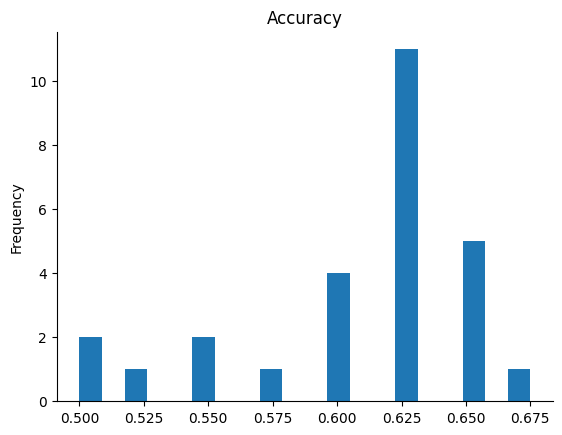

In [142]:
# @title Accuracy

from matplotlib import pyplot as plt
models['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

#### En este caso vamos a elegir SGDClassifier, para clasificar nuestras variable si obtiene buena nota o no

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from fairlearn.metrics import(
    MetricFrame,
    count,
    false_positive_rate,
    selection_rate)
from sklearn.linear_model import SGDClassifier
import json

In [144]:
xx = df0["sex_M"]

In [145]:
X_train, X_test, y_train, y_test, \
    A_train, A_test = train_test_split(x, y, xx, random_state=123)

clf = SGDClassifier(loss='log', alpha=0.001, max_iter=1000, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

metrics = {
    "tpr": recall_score,
    "false positive rate": false_positive_rate}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=A_test)

In [146]:
print("Ratio: \n")
print(metric_frame.ratio())

print("\nBy Group:")
print(metric_frame.by_group)

print("\ndifference:")
print(metric_frame.difference())

print("\noverall:")
print(metric_frame.overall)

Ratio: 

tpr                   0.81
false positive rate   0.77
dtype: float64

By Group:
       tpr  false positive rate
sex_M                          
False 0.79                 0.65
True  0.97                 0.50

difference:
tpr                   0.19
false positive rate   0.15
dtype: float64

overall:
tpr                   0.89
false positive rate   0.57
dtype: float64


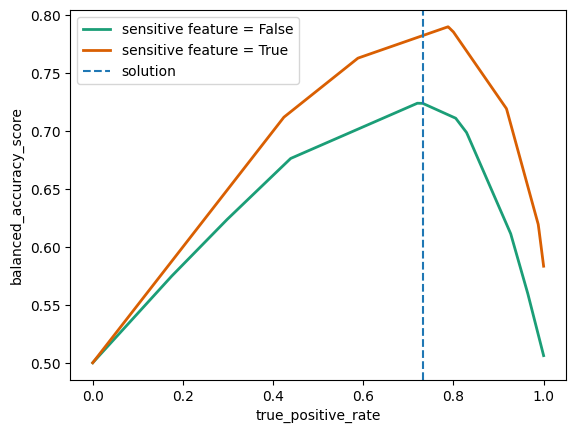

{
    "false": {
        "p0": 0.996,
        "operation0": "[>0.9987338204805736]",
        "p1": 0.0040000000000000036,
        "operation1": "[>0.9778557048281764]"
    },
    "true": {
        "p0": 0.2811764705882353,
        "operation0": "[>0.9999999997049336]",
        "p1": 0.7188235294117646,
        "operation1": "[>0.9999997511640829]"
    }
}


In [147]:
threshold_optimizer = ThresholdOptimizer(
    estimator=clf,
    constraints="true_positive_rate_parity",
        objective="balanced_accuracy_score",
    predict_method="predict_proba",
    prefit=False,
)

threshold_optimizer.fit(X_train, y_train, sensitive_features=A_train)
predictions = threshold_optimizer.predict(X_test, sensitive_features=A_test, random_state=12345)


plot_threshold_optimizer(threshold_optimizer)
threshold_rules_by_group = threshold_optimizer.interpolated_thresholder_.interpolation_dict
print(json.dumps(threshold_rules_by_group, default=str, indent=4))

Diferencia en el Rendimiento entre generos:

En términos de TPR, hay una diferencia de 0.19 entre los dos grupos.

Esto sugiere que el modelo tiene un mejor desempeño en identificar casos positivos entre individuos masculinos en comparación con no masculinos.
En términos de FPR, hay una diferencia de 0.15 entre los dos grupos.
Indica que el modelo tiene una mayor tendencia a clasificar incorrectamente los casos negativos como positivos entre individuos no masculinos en comparación con masculinos.

In [148]:

sensitive = df0["romantic_yes"]

X_train, X_test, y_train, y_test, \
    A_train, A_test = train_test_split(x, y, sensitive, random_state=123)

clf = SGDClassifier(loss='log', alpha=0.001, max_iter=1000, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


metrics = {
    "tpr": recall_score,
    "false positive rate": false_positive_rate}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=A_test)

print("Ratio: \n")
print(metric_frame.ratio())

print("\nBy Group:")
print(metric_frame.by_group)

print("\ndifference:")
print(metric_frame.difference())

print("\noverall:")
print(metric_frame.overall)

Ratio: 

tpr                   0.95
false positive rate   0.51
dtype: float64

By Group:
              tpr  false positive rate
romantic_yes                          
False        0.91                 0.74
True         0.86                 0.38

difference:
tpr                   0.05
false positive rate   0.36
dtype: float64

overall:
tpr                   0.89
false positive rate   0.57
dtype: float64


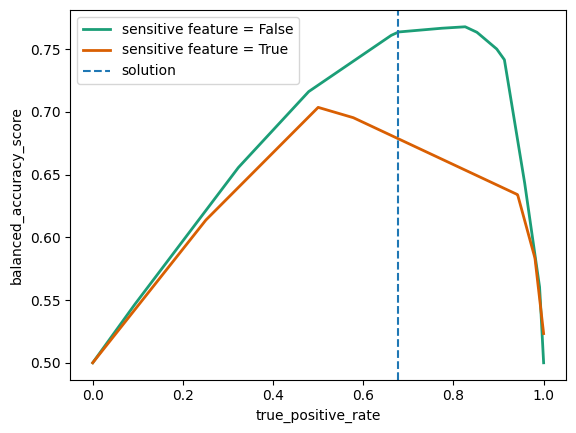

{
    "false": {
        "p0": 0.014999999999995564,
        "operation0": "[>0.9999997902187512]",
        "p1": 0.9850000000000044,
        "operation1": "[>0.9999997465186374]"
    },
    "true": {
        "p0": 0.7233684210526313,
        "operation0": "[>0.9999992500947319]",
        "p1": 0.2766315789473687,
        "operation1": "[>7.388141173436281e-05]"
    }
}


In [149]:
threshold_optimizer = ThresholdOptimizer(
    estimator=clf,
    constraints="true_positive_rate_parity",
        objective="balanced_accuracy_score",
    predict_method="predict_proba",
    prefit=False,
)

threshold_optimizer.fit(X_train, y_train, sensitive_features=A_train)
predictions = threshold_optimizer.predict(X_test, sensitive_features=A_test, random_state=12345)


plot_threshold_optimizer(threshold_optimizer)
threshold_rules_by_group = threshold_optimizer.interpolated_thresholder_.interpolation_dict
print(json.dumps(threshold_rules_by_group, default=str, indent=4))

Diferencia en el Rendimiento entre si tiene relación romantica:

En términos de TPR, hay una diferencia de 0.05 entre los dos grupos.
Esto sugiere que el modelo tiene un ligero mejor desempeño en identificar relaciones no románticas que románticas.
En términos de FPR, hay una diferencia de 0.36 entre los dos grupos.
Indica que el modelo tiene una tendencia significativamente mayor a clasificar erróneamente relaciones románticas como no románticas en comparación con el contrario.

In [150]:
xx = df0['internet_yes']

In [151]:
X_train, X_test, y_train, y_test, \
    A_train, A_test = train_test_split(x, y, xx, random_state=123)

clf = SGDClassifier(loss='log', alpha=0.001, max_iter=1000, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


metrics = {
    "tpr": recall_score,
    "false positive rate": false_positive_rate}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=A_test)

print("Ratio: \n")
print(metric_frame.ratio())

print("\nBy Group:")
print(metric_frame.by_group)

print("\ndifference:")
print(metric_frame.difference())

print("\noverall:")
print(metric_frame.overall)

Ratio: 

tpr                   0.88
false positive rate   0.94
dtype: float64

By Group:
              tpr  false positive rate
internet_yes                          
False        1.00                 0.60
True         0.88                 0.57

difference:
tpr                   0.12
false positive rate   0.03
dtype: float64

overall:
tpr                   0.89
false positive rate   0.57
dtype: float64


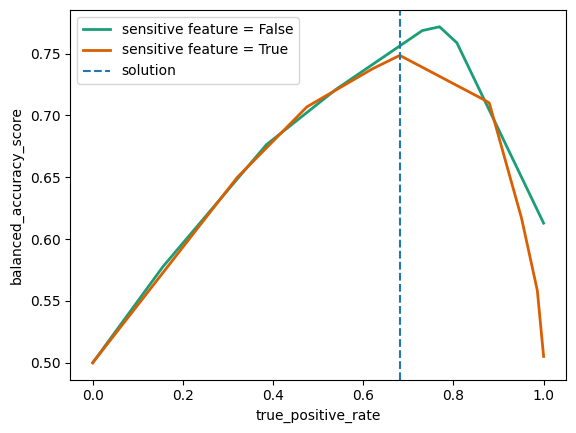

{
    "false": {
        "p0": 0.25879999999999953,
        "operation0": "[>0.9999998494161564]",
        "p1": 0.7412000000000005,
        "operation1": "[>0.9997448962406814]"
    },
    "true": {
        "p0": 0.9991923076923074,
        "operation0": "[>0.9999992664851161]",
        "p1": 0.0008076923076926201,
        "operation1": "[>0.9562901808848208]"
    }
}


In [152]:
threshold_optimizer = ThresholdOptimizer(
    estimator=clf,
    constraints="true_positive_rate_parity",
        objective="balanced_accuracy_score",
    predict_method="predict_proba",
    prefit=False,
)

threshold_optimizer.fit(X_train, y_train, sensitive_features=A_train)
predictions = threshold_optimizer.predict(X_test, sensitive_features=A_test, random_state=12345)


plot_threshold_optimizer(threshold_optimizer)
threshold_rules_by_group = threshold_optimizer.interpolated_thresholder_.interpolation_dict
print(json.dumps(threshold_rules_by_group, default=str, indent=4))

Diferencia en el Rendimiento entre si tienen internet:

En términos de TPR, hay una diferencia de 0.12 entre los dos grupos.
Esto sugiere que el modelo tiene un mejor desempeño en identificar personas que no utilizan Internet que personas que sí lo hacen.
En términos de FPR, hay una diferencia de 0.03 entre los dos grupos.
Indica que la diferencia en la tasa de falsos positivos entre los dos grupos es baja.


In [153]:
xx = df0['activities_yes']

In [154]:

X_train, X_test, y_train, y_test, \
    A_train, A_test = train_test_split(x, y, xx, random_state=123)

clf = SGDClassifier(loss='log', alpha=0.001, max_iter=1000, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


metrics = {
    "tpr": recall_score,
    "false positive rate": false_positive_rate}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=A_test)

print("Ratio: \n")
print(metric_frame.ratio())

print("\nBy Group:")
print(metric_frame.by_group)

print("\ndifference:")
print(metric_frame.difference())

print("\noverall:")
print(metric_frame.overall)

Ratio: 

tpr                   0.99
false positive rate   0.57
dtype: float64

By Group:
                tpr  false positive rate
activities_yes                          
False          0.89                 0.72
True           0.88                 0.41

difference:
tpr                   0.01
false positive rate   0.31
dtype: float64

overall:
tpr                   0.89
false positive rate   0.57
dtype: float64


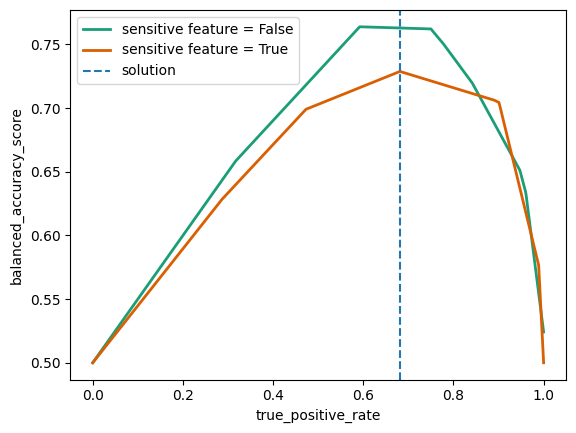

{
    "false": {
        "p0": 0.43699999999999956,
        "operation0": "[>0.9999998057814559]",
        "p1": 0.5630000000000004,
        "operation1": "[>0.9997995679431853]"
    },
    "true": {
        "p0": 0.0015263157894735509,
        "operation0": "[>0.9999999996097043]",
        "p1": 0.9984736842105264,
        "operation1": "[>0.9999994784374054]"
    }
}


In [155]:
threshold_optimizer = ThresholdOptimizer(
    estimator=clf,
    constraints="true_positive_rate_parity",
        objective="balanced_accuracy_score",
    predict_method="predict_proba",
    prefit=False,
)

threshold_optimizer.fit(X_train, y_train, sensitive_features=A_train)
predictions = threshold_optimizer.predict(X_test, sensitive_features=A_test, random_state=12345)


plot_threshold_optimizer(threshold_optimizer)
threshold_rules_by_group = threshold_optimizer.interpolated_thresholder_.interpolation_dict
print(json.dumps(threshold_rules_by_group, default=str, indent=4))

Diferencia en el Rendimiento entre que tienen actividades extracurriculares:

En términos de TPR, hay una diferencia de solo 0.01 entre los dos grupos.
Esto sugiere que el modelo tiene un rendimiento similar en identificar correctamente a las personas que participan o no en actividades extracurriculares.
En términos de FPR, hay una diferencia de 0.31 entre los dos grupos.
Indica que el modelo tiene una tendencia mucho mayor a clasificar erróneamente a las personas que no participan en actividades extracurriculares como participantes, en comparación con la clasificación errónea de participantes como no participantes.

In [156]:
xx = df0['freetime']

In [157]:

X_train, X_test, y_train, y_test, \
    A_train, A_test = train_test_split(x, y, xx, random_state=123)

clf = SGDClassifier(loss='log', alpha=0.001, max_iter=1000, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


metrics = {
    "tpr": recall_score,
    "false positive rate": false_positive_rate}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=A_test)

print("Ratio: \n")
print(metric_frame.ratio())

print("\nBy Group:")
print(metric_frame.by_group)

print("\ndifference:")
print(metric_frame.difference())

print("\noverall:")
print(metric_frame.overall)

Ratio: 

tpr                   0.80
false positive rate   0.33
dtype: float64

By Group:
          tpr  false positive rate
freetime                          
1        1.00                 0.50
2        0.86                 1.00
3        0.96                 0.60
4        0.80                 0.56
5        0.86                 0.33

difference:
tpr                   0.20
false positive rate   0.67
dtype: float64

overall:
tpr                   0.89
false positive rate   0.57
dtype: float64


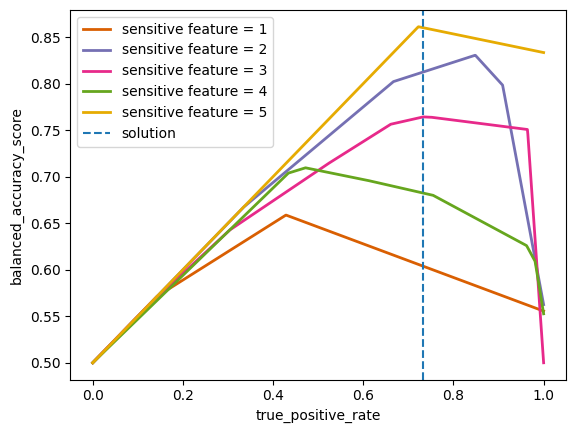

In [158]:
threshold_optimizer = ThresholdOptimizer(
    estimator=clf,
    constraints="true_positive_rate_parity",
        objective="balanced_accuracy_score",
    predict_method="predict_proba",
    prefit=False,
)

threshold_optimizer.fit(X_train, y_train, sensitive_features=A_train)
predictions = threshold_optimizer.predict(X_test, sensitive_features=A_test, random_state=12345)


plot_threshold_optimizer(threshold_optimizer)

Diferencia en el Rendimiento entre los que tienen tiempo libre :

En términos de TPR, hay una diferencia de 0.20 entre los niveles de tiempo libre más alto y más bajo.
Esto sugiere que el modelo es más efectivo en identificar correctamente los casos positivos en los niveles de tiempo libre más altos.
En términos de FPR, hay una diferencia de 0.67 entre los mismos grupos.
Esto indica que el modelo tiene una tendencia mucho mayor a clasificar erróneamente los casos negativos como positivos en los niveles de tiempo libre más bajos en comparación con los niveles más altos.

In [159]:
x = df0.copy()
xx = df0['guardian_mother']


In [160]:


X_train, X_test, y_train, y_test, \
    A_train, A_test = train_test_split(x, y, xx , random_state=123)


clf = SGDClassifier(loss='log', alpha=0.001, max_iter=1000, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


metrics = {
    "tpr": recall_score,
    "false positive rate": false_positive_rate}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=A_test)

print("Ratio: \n")
print(metric_frame.ratio())

print("\nBy Group:")
print(metric_frame.by_group)

print("\ndifference:")
print(metric_frame.difference())

print("\noverall:")
print(metric_frame.overall)

Ratio: 

tpr                   0.92
false positive rate    NaN
dtype: float64

By Group:
                 tpr  false positive rate
guardian_mother                          
False           0.92                 0.00
True            0.85                 0.00

difference:
tpr                   0.07
false positive rate   0.00
dtype: float64

overall:
tpr                   0.86
false positive rate   0.00
dtype: float64


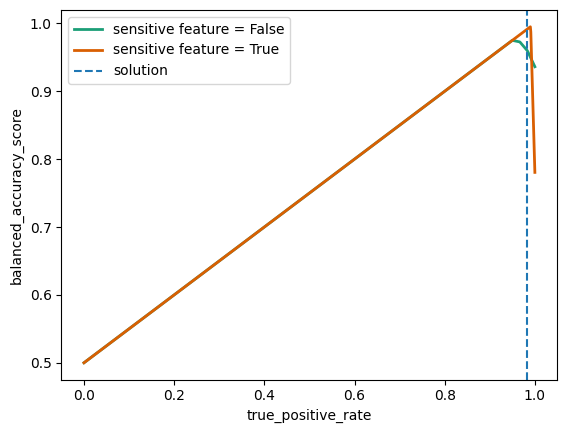

In [161]:
threshold_optimizer = ThresholdOptimizer(
    estimator=clf,
    constraints="true_positive_rate_parity",
    # demographic_parity, equalized_odds, true_positive_rate_parity, false_positive_rate_parity, true_negative_rate_parity, false_negative_rate_parity
    objective="balanced_accuracy_score",
    # selection rate
    predict_method="predict_proba",
    prefit=False,
)

threshold_optimizer.fit(X_train, y_train, sensitive_features=A_train)
predictions = threshold_optimizer.predict(X_test, sensitive_features=A_test, random_state=12345)


plot_threshold_optimizer(threshold_optimizer)

Diferencia en el Rendimiento entre Grupos:

En términos de TPR, hay una diferencia de 0.07 entre los grupos.
Esto sugiere que el modelo tiene un mejor rendimiento en identificar correctamente los casos positivos cuando la figura de cuidado principal no es la madre en comparación con cuando sí lo es.
No hay diferencia en la tasa de falsos positivos (FPR) entre los grupos.

# Conclusión

Como conclusiones me gustó investigar este proyecto porque muestra diferentes formas de que afecta en la clasificación de si es un buen o mal estudiante dadas las variables para segmentar el performance como lo es si tiene internet, quién lo cuida, etc. Cada una de estas variables tiene un impacto para la igualdad de selección y clasificación del estudiante. por lo tanto se debe tomar en cuenta la selección que se hace por parte del modelo dado que a manera estadistica está bien, pero a nivel moral si se puede tener mayor impacto si se incluye opinión de validación como es el ejemplo de otorgar una beca dado el performance el estudiante, teniendo en cuenta las variables de impacto del mismo.